Importing Dependancies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

Data collection & Processing

In [2]:
# loading the data from csv file to pandas dataFrame
air_quality_data = pd.read_csv('AirQualityUCI.csv')
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
#checking for the missing values
air_quality_data.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [4]:
#Dropping the unnecessary column
air_quality_data = air_quality_data.drop(columns=['Unnamed: 15','Unnamed: 16'])
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [5]:
#printing last 5 rows
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking the total number of rows and columns in the dataset
air_quality_data.shape

(9471, 15)

In [7]:
# Viewing a specific data point to identify the end of valid sensor readings
# This helps in identifying where the null values start
air_quality_data.loc[[9356]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9356,4/4/2005,14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


Here 9356 represents the last data point in the dataframe & remaining rows are just null values

index = 9356
row = 9357th row

Taking first 9357 rows alone from the dataFrame

In [8]:
# Slicing the dataframe to keep only rows with valid data (0 to 9356)
air_quality_data = air_quality_data.head(9357)

In [9]:
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [10]:
# Displaying the last 5 rows
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [11]:
#checking for the missing values
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [12]:
#Getting info from the data
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


This shows that there are no missing values in the datasets.
But the actual missing values are tagged with the valuse '-200'

This is described in UCI repository documentation

In [13]:
#counting the number of times -200 appears in the data
air_quality_data.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Handling the missing values

In [14]:
#Replacing the placeholder value -200 with NaN
air_quality_data = air_quality_data.replace(-200, np.nan)

In [15]:
#checking for the missing values
air_quality_data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [16]:
# Filling missing values with the mean of each column
air_quality_data = air_quality_data.fillna(air_quality_data.mean(numeric_only=True))

In [17]:
#checking for the missing values 
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [18]:
# Generating a statistical summary
air_quality_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.316068,212.791672,63.870229,7.302650,261.560236,193.426632,251.743954,43.920954,339.367559,390.612324,8.657639,16.974801,0.395835
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,941.000000,218.811816,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100
50%,2.152750,1075.000000,218.811816,8.600000,923.000000,229.000000,818.000000,113.091251,1456.264598,983.000000,18.300000,49.234201,1.015400
75%,2.600000,1221.000000,218.811816,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [19]:
# Checking the total number of rows and columns in the dataset
air_quality_data.shape

(9357, 15)

Forecasting with FB Prophet Algorithm
FB Prophet documentation: https://facebook.github.io/prophet/docs/quick_start.html

In [20]:
#convertoing the date from DD/MM/YYYY to YYYY-MM-DD
date_info = pd.to_datetime(air_quality_data['Date'])
date_info

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]

In [21]:
# Extracting the 'Time' column into a separate series
time_info = air_quality_data['Time']
time_info

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object

In [22]:
type(date_info)
type(time_info)

pandas.core.series.Series

In [23]:
#combining 2 series to pandas dataFrame
date_time = pd.concat([date_info,time_info],axis=1)

In [24]:
date_time.head()

,Date,Time
0,2004-03-10,18:00:00
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00


In [25]:
# Checking the total number of rows and columns in the dataset
date_time.shape

(9357, 2)

In [26]:
#combining date & time
date_time['ds'] = date_time['Date'].astype(str)+' '+date_time['Time'].astype(str)

In [27]:
date_time.head()

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00


In [28]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


Converting ds from object datatype to date time format

In [29]:
data = pd.DataFrame()

In [30]:
# Converting combined date-time string to a proper datetime object
data['ds'] = pd.to_datetime(date_time['ds'])

In [31]:
data.head()

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


In [32]:
# Setting 'RH' (Relative Humidity) as our target variable 'y'
data['y']= air_quality_data['RH']

In [33]:
# Displaying the first 5 rows
data.head()

,ds,y
0,2004-03-10 18:00:00,48.9
1,2004-03-10 19:00:00,47.7
2,2004-03-10 20:00:00,54.0
3,2004-03-10 21:00:00,60.0
4,2004-03-10 22:00:00,59.6


Training the Prophet Model

In [34]:
model =Prophet( )

In [35]:
model.fit(data)

10:02:39 - cmdstanpy - INFO - Chain [1] start processing
10:02:41 - cmdstanpy - INFO - Chain [1] done processing


Future Forecasting
Generating a future time-frame for the next 365 hours and predicting the Air Quality (RH) values.

In [36]:
# Creating future time-slots for 365 hours
future = model.make_future_dataframe(periods=365, freq='h')
future.tail()

,ds
9717,2005-04-19 15:00:00
9718,2005-04-19 16:00:00
9719,2005-04-19 17:00:00
9720,2005-04-19 18:00:00
9721,2005-04-19 19:00:00


In [37]:
# Predicting the future values
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9717,2005-04-19 15:00:00,33.553257,18.918400,48.992625
9718,2005-04-19 16:00:00,34.036783,19.001521,49.613111
9719,2005-04-19 17:00:00,35.670102,19.440438,50.596637
9720,2005-04-19 18:00:00,38.565725,22.078881,54.472946
9721,2005-04-19 19:00:00,42.119927,26.575324,57.710304


Model Visualization
Plotting the forecasted trends and analyzing seasonal components (Trend, Weekly, and Daily patterns).

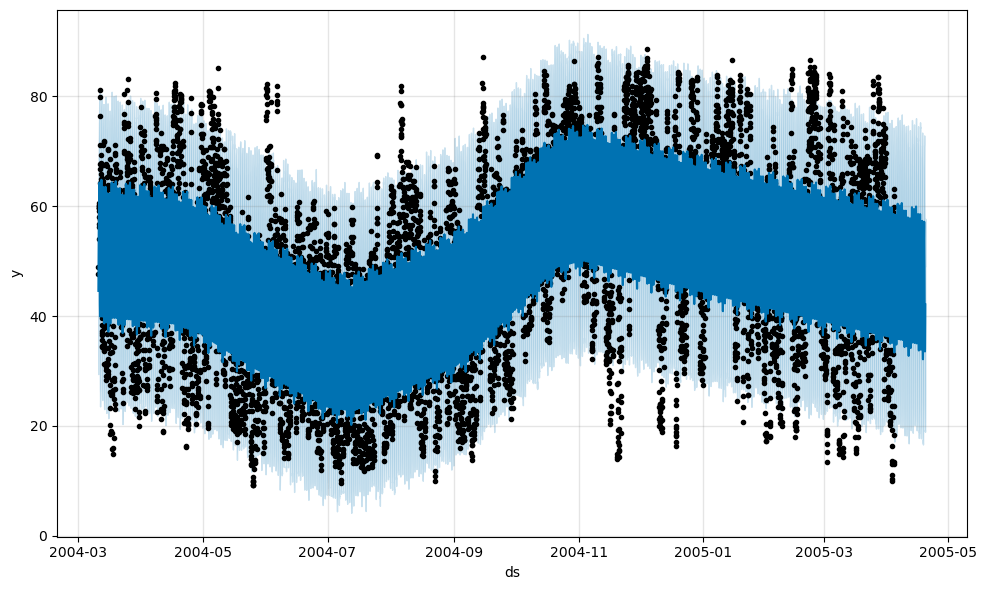

In [38]:
# Plotting the main forecast graph
fig1 = model.plot(forecast)

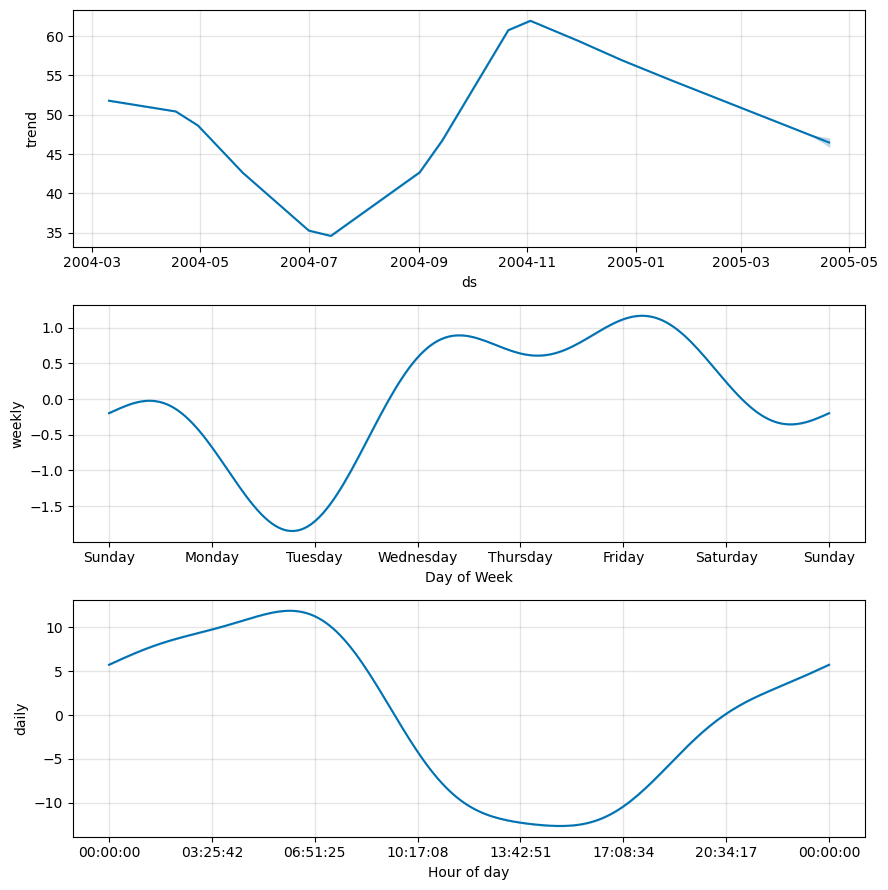

In [39]:
# Analyzing seasonal trends
fig2 = model.plot_components(forecast)